In [1]:
import json
import os

# 读取 pretrain_hq.jsonl 文件
jsonl_path = 'dataset/pretrain_hq.jsonl'

# 检查文件是否存在
if not os.path.exists(jsonl_path):
    print(f"错误: 文件 {jsonl_path} 不存在")
else:
    # 读取所有数据
    data = []
    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f, 1):
            try:
                item = json.loads(line.strip())
                data.append(item)
            except json.JSONDecodeError as e:
                print(f"警告: 第 {line_num} 行解析失败: {e}")
                continue
    
    print(f"成功读取 {len(data)} 条数据")
    print(f"\n第一条数据示例:")
    print(json.dumps(data[0], ensure_ascii=False, indent=2))
    
    # 显示数据统计信息
    if data:
        text_lengths = [len(item.get('text', '')) for item in data]
        print(f"\n数据统计:")
        print(f"  总条数: {len(data)}")
        print(f"  文本平均长度: {sum(text_lengths) / len(text_lengths):.2f} 字符")
        print(f"  文本最短长度: {min(text_lengths)} 字符")
        print(f"  文本最长长度: {max(text_lengths)} 字符")


成功读取 1413103 条数据

第一条数据示例:
{
  "text": "<|im_start|>鉴别一组中文文章的风格和特点，例如官方、口语、文言等。需要提供样例文章才能准确鉴别不同的风格和特点。<|im_end|> <|im_start|>好的，现在帮我查一下今天的天气怎么样?今天的天气依据地区而异。请问你需要我帮你查询哪个地区的天气呢？<|im_end|> <|im_start|>打开闹钟功能，定一个明天早上七点的闹钟。好的，我已经帮您打开闹钟功能，闹钟将在明天早上七点准时响起。<|im_end|> <|im_start|>为以下场景写一句话描述：一个孤独的老人坐在公园长椅上看着远处。一位孤独的老人坐在公园长椅上凝视远方。<|im_end|> <|im_start|>非常感谢你的回答。请告诉我，这些数据是关于什么主题的？这些数据是关于不同年龄段的男女人口比例分布的。<|im_end|> <|im_start|>帮我想一个有趣的标题。这个挺有趣的：\"如何成为一名成功的魔术师\" 调皮的标题往往会吸引读者的注意力。<|im_end|> <|im_start|>回答一个问题，地球的半径是多少？地球的平均半径约为6371公里，这是地球自赤道到两极的距离的平均值。<|im_end|> <|im_start|>识别文本中的语气，并将其分类为喜悦、悲伤、惊异等。\n文本：“今天是我的生日！”这个文本的语气是喜悦。<|im_end|>"
}

数据统计:
  总条数: 1413103
  文本平均长度: 437.05 字符
  文本最短长度: 272 字符
  文本最长长度: 639 字符


In [23]:
df.head()

,id,url,title,text
0,12,https://en.wikipedia.org/wiki/Anarchism,Anarchism,Anarchism is a political philosophy and moveme...
1,39,https://en.wikipedia.org/wiki/Albedo,Albedo,Albedo (; ) is the fraction of sunlight that i...
2,290,https://en.wikipedia.org/wiki/A,A,"A, or a, is the first letter and the first vow..."
3,303,https://en.wikipedia.org/wiki/Alabama,Alabama,Alabama () is a state in the Southeastern regi...
4,305,https://en.wikipedia.org/wiki/Achilles,Achilles,"In Greek mythology, Achilles ( ) or Achilleus ..."


In [22]:
import pandas as pd
import os

# 读取 0000.parquet 文件
parquet_path = 'dataset/train-00000-of-00041.parquet'

# 检查文件是否存在
if not os.path.exists(parquet_path):
    print(f"错误: 文件 {parquet_path} 不存在")
else:
    try:
        # 读取 parquet 文件
        df = pd.read_parquet(parquet_path)
        
        print(f"成功读取 parquet 文件")
        print(f"\n数据形状: {df.shape[0]} 行 × {df.shape[1]} 列")
        print(f"\n列名: {df.columns.tolist()}")
        print(f"\n数据类型:")
        print(df.dtypes)
        
        print(f"\n前5行数据:")
        print(df.head(5))
        
        # print(f"\n数据统计信息:")
        # print(df.describe(include='all'))
        
        # 检查是否有缺失值
        if df.isnull().any().any():
            print(f"\n缺失值统计:")
            print(df.isnull().sum())
        else:
            print(f"\n✓ 没有缺失值")
            
    except ImportError as e:
        print(f"错误: 需要安装 pandas 和 pyarrow 库")
        print(f"请运行: pip install pandas pyarrow")
        print(f"错误详情: {e}")
    except Exception as e:
        print(f"读取文件时出错: {e}")


成功读取 parquet 文件

数据形状: 156289 行 × 4 列

列名: ['id', 'url', 'title', 'text']

数据类型:
id       object
url      object
title    object
text     object
dtype: object

前5行数据:
    id                                      url      title  \
0   12  https://en.wikipedia.org/wiki/Anarchism  Anarchism   
1   39     https://en.wikipedia.org/wiki/Albedo     Albedo   
2  290          https://en.wikipedia.org/wiki/A          A   
3  303    https://en.wikipedia.org/wiki/Alabama    Alabama   
4  305   https://en.wikipedia.org/wiki/Achilles   Achilles   

                                                text  
0  Anarchism is a political philosophy and moveme...  
1  Albedo (; ) is the fraction of sunlight that i...  
2  A, or a, is the first letter and the first vow...  
3  Alabama () is a state in the Southeastern regi...  
4  In Greek mythology, Achilles ( ) or Achilleus ...  

✓ 没有缺失值


In [ ]:
from bs4 import BeautifulSoup
import re

def clean_html_text_bs4(text):
    """
    使用BeautifulSoup清洗HTML文本（更强大，推荐用于复杂HTML）

    Args:
        text: 包含HTML标签的文本字符串

    Returns:
        清洗后的纯文本
    """
    if not isinstance(text, str) or not text:
        return text

    # 使用BeautifulSoup解析HTML
    soup = BeautifulSoup(text, "html.parser")

    # 获取纯文本
    text = soup.get_text(separator=" ", strip=True)

    # 清理多余的空白字符
    text = re.sub(r"\s+", " ", text)

    # 去除首尾空白
    text = text.strip()

    return text

In [1]:
import json
import pandas as pd
import os

# 读取 0000.parquet 文件
for idx in range(1):
    parquet_path = 'dataset/ag_news.parquet'
    df = pd.read_parquet(parquet_path)
    with open("./dataset/pretrain_en_ag_news.jsonl", "a", encoding="utf-8") as f:
        for i in range(len(df)):
            text=df.at[i,'text']
            text='<|im_start|>'+text+'<|im_end|>'
            data={'text':text}
            f.write(json.dumps(data,ensure_ascii=False))
            f.write('\n')

In [24]:
import json
import pandas as pd
import os

# 读取 0000.parquet 文件
for idx in range(2):
    parquet_path = f'dataset/train-0000{idx}-of-00041.parquet'
    df = pd.read_parquet(parquet_path)
    with open("./dataset/pretrain_en_wiki.jsonl", "a", encoding="utf-8") as f:
        for i in range(len(df)):
            raw_document=df.at[i,'text']
            raw_document='<|im_start|>body:'+raw_document+'<|im_end|>'
            document_outline=df.at[i,'title']
            document_outline='<|im_start|>title:'+document_outline+'<|im_end|>'
            text=document_outline+raw_document
            data={'text':text}
            f.write(json.dumps(data,ensure_ascii=False))
            f.write('\n')

In [21]:
import json
import pandas as pd
import os

# 读取 0000.parquet 文件
for idx in range(1):
    parquet_path = 'dataset/0000 (3).parquet'
    df = pd.read_parquet(parquet_path)
    with open("./dataset/pretrain_en_sports.jsonl", "a", encoding="utf-8") as f:
        for i in range(len(df)):
            raw_document=df.at[i,'raw_document']
            raw_document='<|im_start|>body:'+raw_document+'<|im_end|>'
            document_outline=df.at[i,'document_outline']
            document_outline='<|im_start|>title:'+document_outline+'<|im_end|>'
            text=document_outline+raw_document
            data={'text':text}
            f.write(json.dumps(data,ensure_ascii=False))
            f.write('\n')

In [15]:
import json
import pandas as pd
import os

# 读取 0000.parquet 文件
for idx in range(1):
    parquet_path = 'dataset/0014_economics.parquet'
    df = pd.read_parquet(parquet_path)
    with open("./dataset/pretrain_en_economics.jsonl", "a", encoding="utf-8") as f:
        for i in range(len(df)):
            text=df.at[i,'text']
            if text[:3]=='-- ':
                text=text[3:]
            if 'Photographer' in text:
                text = text.split('Photographer')[0]
            if len(text)<200:
                continue
            text='<|im_start|>'+text+'<|im_end|>'
            data={'text':text}
            f.write(json.dumps(data,ensure_ascii=False))
            f.write('\n')

In [ ]:
import json
import pandas as pd
import os

# 读取 0000.parquet 文件
for idx in range(1):
    parquet_path = f'dataset/000{idx} (3).parquet'
    df = pd.read_parquet(parquet_path)
    with open("./dataset/pretrain_en_sports.jsonl", "a", encoding="utf-8") as f:
        for i in range(len(df)):
            text=''
            question_title=df.at[i,'question_title']
            question_body=df.at[i,'question_body']
            text='title:'+question_title+'\n'+'body:'+question_body
            text='<|im_start|>'+text+'<|im_end|>'
            answers=df.at[i,'answers']
            for answer in answers:
                answer_text=answer['body']
                answer_text='<|im_start|>'+answer_text+'<|im_end|>'
                text=text+answer_text
            text=clean_html_text_bs4(text)
            data={'text':text}
            f.write(json.dumps(data,ensure_ascii=False))
            f.write('\n')

In [4]:
import json
import os
import glob

input_pattern = 'dataset/pretrain_en*.jsonl'
output_file = 'dataset/pretrain_en_merged.jsonl'

seen_texts = set()
total_count = 0
unique_count = 0

input_files = glob.glob(input_pattern)
print(f"Found {len(input_files)} files:")
for f in input_files:
    print(f"  - {f}")

print(f"\nProcessing files...")

with open(output_file, 'w', encoding='utf-8') as out_f:
    for file_path in input_files:
        print(f"\nProcessing: {file_path}")
        file_count = 0
        file_unique = 0
        
        try:
            with open(file_path, 'r', encoding='utf-8') as in_f:
                for line_num, line in enumerate(in_f, 1):
                    try:
                        item = json.loads(line.strip())
                        text = item.get('text', '')
                        
                        if not text:
                            continue
                        
                        total_count += 1
                        file_count += 1
                        
                        if text not in seen_texts:
                            seen_texts.add(text)
                            unique_count += 1
                            file_unique += 1
                            out_f.write(json.dumps({'text': text}, ensure_ascii=False) + '\n')
                    except json.JSONDecodeError as e:
                        print(f"  Warning: Line {line_num} parse error: {e}")
                        continue
                    except Exception as e:
                        print(f"  Warning: Line {line_num} error: {e}")
                        continue
            
            print(f"  Processed: {file_count} entries, {file_unique} unique (new)")
        except Exception as e:
            print(f"  Error reading file: {e}")
            continue

print(f"\n{'='*50}")
print(f"Total entries processed: {total_count}")
print(f"Unique entries: {unique_count}")
print(f"Duplicates removed: {total_count - unique_count}")
print(f"Output saved to: {output_file}")


Found 8 files:
  - dataset\pretrain_en_ag_news.jsonl
  - dataset\pretrain_en_economics.jsonl
  - dataset\pretrain_en_entertainmentswiki_chunked.jsonl
  - dataset\pretrain_en_fineweb.jsonl
  - dataset\pretrain_en_law.jsonl
  - dataset\pretrain_en_sports.jsonl
  - dataset\pretrain_en_sportsswiki_chunked.jsonl
  - dataset\pretrain_en_wiki.jsonl

Processing files...

Processing: dataset\pretrain_en_ag_news.jsonl
  Processed: 120000 entries, 120000 unique (new)

Processing: dataset\pretrain_en_economics.jsonl
  Processed: 45403 entries, 45388 unique (new)

Processing: dataset\pretrain_en_entertainmentswiki_chunked.jsonl
  Processed: 9031 entries, 8750 unique (new)

Processing: dataset\pretrain_en_fineweb.jsonl
  Processed: 970397 entries, 970397 unique (new)

Processing: dataset\pretrain_en_law.jsonl
  Processed: 24370 entries, 24370 unique (new)

Processing: dataset\pretrain_en_sports.jsonl
  Processed: 42933 entries, 382 unique (new)

Processing: dataset\pretrain_en_sportsswiki_chunked.js

In [3]:
import json
import re
import os

def split_text_into_chunks(text, target_words=700, overlap_words=50):
    """
    将文本切分成指定单词数的chunks，尽量在句子边界处切分
    
    Args:
        text: 要切分的文本
        target_words: 目标单词数（约）
        overlap_words: chunk之间的重叠单词数
    
    Returns:
        chunks列表
    """
    if not text or not text.strip():
        return []
    
    # 按空格分割单词
    words = text.split()
    if len(words) <= target_words:
        return [text]
    
    chunks = []
    start_idx = 0
    
    while start_idx < len(words):
        # 计算当前chunk的结束位置
        end_idx = min(start_idx + target_words, len(words))
        
        # 如果还没到文本末尾，尝试在句子边界处切分
        if end_idx < len(words):
            # 向后查找句子结束符（. ! ? 后跟空格或换行）
            # 在目标位置前后100个单词范围内查找
            search_start = max(start_idx + target_words - 100, start_idx)
            search_end = min(end_idx + 100, len(words))
            
            best_split = end_idx
            # 从目标位置向前查找句子边界
            for i in range(end_idx, search_start, -1):
                if i < len(words):
                    # 检查前一个单词是否以句子结束符结尾
                    prev_word = words[i-1] if i > 0 else ""
                    if prev_word and re.search(r'[.!?]$', prev_word):
                        best_split = i
                        break
            
            end_idx = best_split
        
        # 提取chunk
        chunk_words = words[start_idx:end_idx]
        chunk_text = " ".join(chunk_words)
        
        if chunk_text.strip():
            chunks.append(chunk_text.strip())
        
        # 移动到下一个chunk的起始位置（考虑重叠）
        if end_idx >= len(words):
            break
        start_idx = max(end_idx - overlap_words, start_idx + 1)
    
    return chunks


# 读取 sports_wiki.jsonl 并切分
input_file = './sports_wiki.jsonl'
output_file = './dataset/pretrain_en_sportsswiki_chunked.jsonl'

if not os.path.exists(input_file):
    print(f"错误: 文件 {input_file} 不存在")
else:
    total_articles = 0
    total_chunks = 0
    
    with open(input_file, 'r', encoding='utf-8') as f_in, \
         open(output_file, 'w', encoding='utf-8') as f_out:
        
        for line_num, line in enumerate(f_in, 1):
            try:
                item = json.loads(line.strip())
                text = item.get('text', '')
                
                if not text:
                    continue
                
                total_articles += 1
                
                # 切分成chunks
                chunks = split_text_into_chunks(text, target_words=700, overlap_words=50)
                
                # 写入每个chunk
                for chunk in chunks:
                    chunk_item = {'text': chunk}
                    f_out.write(json.dumps(chunk_item, ensure_ascii=False) + '\n')
                    total_chunks += 1
                
                # 每处理100篇文章打印一次进度
                if total_articles % 100 == 0:
                    print(f"已处理 {total_articles} 篇文章，生成 {total_chunks} 个chunks...")
                    
            except json.JSONDecodeError as e:
                print(f"警告: 第 {line_num} 行解析失败: {e}")
                continue
            except Exception as e:
                print(f"警告: 第 {line_num} 行处理出错: {e}")
                continue

已处理 100 篇文章，生成 100 个chunks...
已处理 200 篇文章，生成 200 个chunks...
已处理 300 篇文章，生成 301 个chunks...
已处理 400 篇文章，生成 401 个chunks...
已处理 500 篇文章，生成 501 个chunks...
已处理 600 篇文章，生成 601 个chunks...
已处理 700 篇文章，生成 701 个chunks...
已处理 800 篇文章，生成 801 个chunks...
已处理 900 篇文章，生成 901 个chunks...
已处理 1000 篇文章，生成 1001 个chunks...
已处理 1100 篇文章，生成 1101 个chunks...
已处理 1200 篇文章，生成 1201 个chunks...
已处理 1300 篇文章，生成 1301 个chunks...
已处理 1400 篇文章，生成 1402 个chunks...
已处理 1500 篇文章，生成 1503 个chunks...
已处理 1600 篇文章，生成 1603 个chunks...
已处理 1700 篇文章，生成 1703 个chunks...
已处理 1800 篇文章，生成 1803 个chunks...
已处理 1900 篇文章，生成 1910 个chunks...
已处理 2000 篇文章，生成 2010 个chunks...
已处理 2100 篇文章，生成 2111 个chunks...
已处理 2200 篇文章，生成 2211 个chunks...
已处理 2300 篇文章，生成 2311 个chunks...
已处理 2400 篇文章，生成 2412 个chunks...
已处理 2500 篇文章，生成 2513 个chunks...
已处理 2600 篇文章，生成 2613 个chunks...
已处理 2700 篇文章，生成 2714 个chunks...
已处理 2800 篇文章，生成 2814 个chunks...
已处理 2900 篇文章，生成 2915 个chunks...
已处理 3000 篇文章，生成 3015 个chunks...
已处理 3100 篇文章，生成 3115 个chunks...
已处理 3200 篇文章，生成 3215 个chun

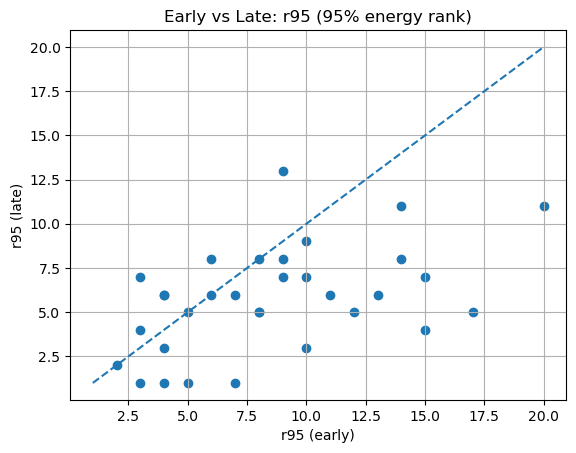

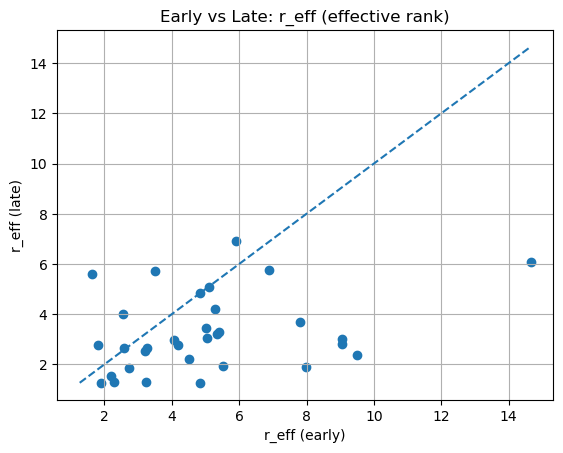

Top-10 layers by r95 ratio (late/early):
model.layers.7.self_attn.k_proj                early= 3 late= 7  ratio= 2.33  diff=+4
model.layers.0.self_attn.v_proj                early= 4 late= 6  ratio= 1.50  diff=+2
model.layers.0.self_attn.o_proj                early= 4 late= 6  ratio= 1.50  diff=+2
model.layers.4.self_attn.k_proj                early= 9 late=13  ratio= 1.44  diff=+4
model.layers.0.self_attn.k_proj                early= 6 late= 8  ratio= 1.33  diff=+2
model.layers.7.self_attn.v_proj                early= 3 late= 4  ratio= 1.33  diff=+1
model.layers.4.self_attn.v_proj                early= 6 late= 6  ratio= 1.00  diff=+0
model.layers.1.self_attn.v_proj                early= 5 late= 5  ratio= 1.00  diff=+0
model.layers.1.self_attn.k_proj                early= 8 late= 8  ratio= 1.00  diff=+0
model.layers.0.self_attn.q_proj                early= 2 late= 2  ratio= 1.00  diff=+0


In [3]:
import re
import matplotlib.pyplot as plt
with open("log.txt", "r", encoding="utf-8") as f:
    text = f.read()
blocks = text.split("Validation Accuracy:")

def parse_block(block_text):
    pat = r"LoRA rank for (.*?):\s*(\d+)\s*r_eff:\s*([0-9.]+)"
    out = {}
    for name, r95, reff in re.findall(pat, block_text):
        out[name.strip()] = (int(r95), float(reff))
    return out

epoch_stats = []
for i in range(0, 6):  # epoch1..5
    epoch_stats.append(parse_block(blocks[i]))

early = epoch_stats[0]  # epoch1
late  = epoch_stats[1]  # epoch5

# 3) 对齐键（只取 early&late 都存在的层）
keys = sorted(set(early.keys()) & set(late.keys()))
x_r95 = [early[k][0] for k in keys]
y_r95 = [late[k][0]  for k in keys]
x_re  = [early[k][1] for k in keys]
y_re  = [late[k][1]  for k in keys]

# 4) 画图函数
def scatter_with_y_eq_x(x, y, title, xlabel, ylabel):
    plt.figure()
    plt.scatter(x, y)
    mn = min(min(x), min(y))
    mx = max(max(x), max(y))
    plt.plot([mn, mx], [mn, mx], linestyle="--")  # y=x
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

scatter_with_y_eq_x(x_r95, y_r95,
                    "Early vs Late: r95 (95% energy rank)",
                    "r95 (early)", "r95 (late)")

scatter_with_y_eq_x(x_re, y_re,
                    "Early vs Late: r_eff (effective rank)",
                    "r_eff (early)", "r_eff (late)")

plt.show()

# 5) 顺手输出“变化最大”的层（按 r95 比值）
ratios = []
for k in keys:
    e, l = early[k][0], late[k][0]
    ratios.append((l / max(e, 1e-9), l - e, k, e, l))
ratios.sort(reverse=True)

print("Top-10 layers by r95 ratio (late/early):")
for ratio, diff, k, e, l in ratios[:10]:
    print(f"{k:45s}  early={e:2d} late={l:2d}  ratio={ratio:5.2f}  diff={diff:+d}")
